In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("test.csv")

#Datos faltantes
datos_faltantes =df.isnull().sum()
print(datos_faltantes)
#df.head()
#df.describe()


id           0
bin_0    11901
bin_1    12038
bin_2    11972
bin_3    11951
bin_4    11951
nom_0    12062
nom_1    11947
nom_2    12179
nom_3    12176
nom_4    11993
nom_5    11912
nom_6    12012
nom_7    12003
nom_8    11956
nom_9    12060
ord_0    11893
ord_1    12167
ord_2    12105
ord_3    12053
ord_4    11933
ord_5    12047
day      12025
month    11984
dtype: int64


In [5]:
#Visuazlacion de datos
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0


In [6]:
# Eliminar columnas con más del 70% de valores faltantes
umbral = 0.7
columnas_a_eliminar = df.columns[df.isnull().mean() > umbral]
df.drop(columns=columnas_a_eliminar, inplace=True)

In [7]:
# Eliminar columnas con baja variabilidad
columnas_baja_variabilidad = [col for col in df.select_dtypes(include=['object']).columns 
                              if df[col].value_counts(normalize=True).max() > 0.95]
df.drop(columns=columnas_baja_variabilidad, inplace=True)

In [8]:
#Llenado de datos faltantes de tipo float64 con la mediana
for col in df.select_dtypes(include=['float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

#Llenado de datos faltantes de tipo str con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


#Datos faltantes
datos_faltantes =df.isnull().sum()
print(datos_faltantes)

C:\Users\Windows\AppData\Local\Temp\ipykernel_10796\3116093107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_10796\3116093107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

id       0
bin_0    0
bin_1    0
bin_2    0
bin_3    0
bin_4    0
nom_0    0
nom_1    0
nom_2    0
nom_3    0
nom_4    0
nom_5    0
nom_6    0
nom_7    0
nom_8    0
nom_9    0
ord_0    0
ord_1    0
ord_2    0
ord_3    0
ord_4    0
ord_5    0
day      0
month    0
dtype: int64


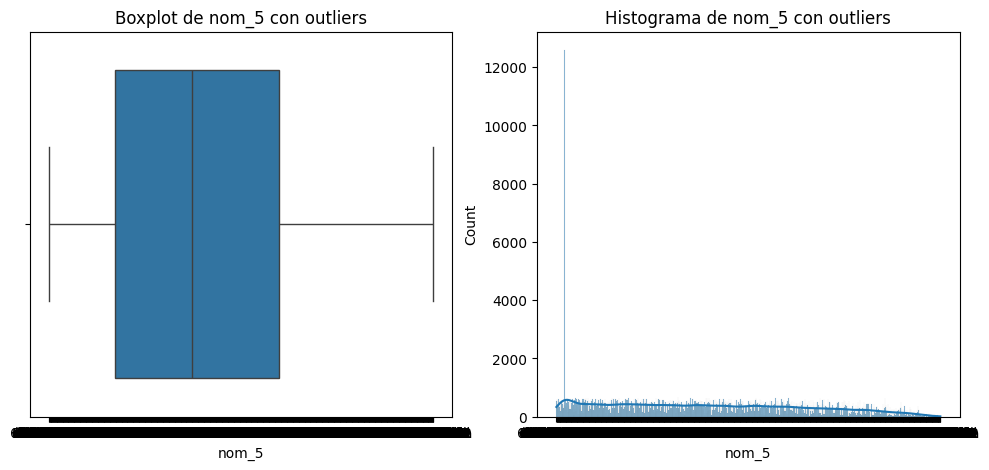

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df["nom_5"])
plt.title("Boxplot de nom_5 con outliers")


plt.subplot(1,2,2)
sns.histplot(df["nom_5"],kde=True)
plt.title("Histograma de nom_5 con outliers")
plt.show()